# Part 1: Understanding and defining the problem

### The goal of this task is to predict the poverty level for each household.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#### Q1: Define the machine learning problem of this problem (supervised, unsupervised, binary classification, etc.)

**Solution)** target이 있기 때문에 supervised learning이고, 4개의 categories가 있기 때문에 multinomial classification이다.

#### Q2: Explain the meaning of the target and the categories of the target.
In the dataset, we are given data on the individual level with each individual having unique features, but also information about their household. We have to make a prediction for every HOUSEHOLD ONLY, not the individuals.

**Solution)**  target은 4개의 소득 level을 나타낸다. 1은 extreme poverty이고, 2는 moderate poverty, 3은 vulnerable households, 4는 non-vulnerable households를 나타낸다. 

#### Q3: Determine what methods can be done to get the prediction for each household, and not for each individual.

**Solution)**  각각의 household의 unique identifier인 idhogar feature를 사용해서 각각의 household를 구분하고, 이 사람이 household의 head인지 아닌지를 나타내는 parentesco1 feature를 사용해서 구분된 household의 head를 찾아낸다. 각각의 household를 예측하는 방법으로는 찾아낸 household의 head 정보를 통해 예측할 것 이다.

#### Q4: Some individuals belong to the label "no head of household". Determine what should be done with these individuals.

**Solution)** household의 head가 없는 label은 삭제한다.

#### Q5: Identify the features that seem important just by reading their definitions.

**Solution)** v2a1, rooms, r4t3, sanitario1, parentesco1, idhogar, hogar_total, dependency, qmobilephone

# Part 2: Data exploration

### After reading the train and test data, we have to explore the dataset.

#### Q1: Identify the shapes of the train and test dataset.

In [560]:
train_csv = pd.read_csv('train.csv')
train_csv.T

,0,1,2,3,4,5,6,7,8,9,...,9547,9548,9549,9550,9551,9552,9553,9554,9555,9556
Id,ID_279628684,ID_f29eb3ddd,ID_68de51c94,ID_d671db89c,ID_d56d6f5f5,ID_ec05b1a7b,ID_e9e0c1100,ID_3e04e571e,ID_1284f8aad,ID_51f52fdd2,...,ID_198be48d1,ID_9df63c33e,ID_aacac04a2,ID_90a399a51,ID_79d39dddc,ID_d45ae367d,ID_c94744e07,ID_85fc658f8,ID_ced540c61,ID_a38c64491
v2a1,190000,135000,NaN,180000,180000,180000,180000,130000,130000,130000,...,46500,46500,46500,NaN,NaN,80000,80000,80000,80000,80000
hacdor,0,0,0,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
rooms,3,4,8,5,5,5,5,2,2,2,...,5,5,5,3,3,6,6,6,6,6
hacapo,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SQBovercrowding,1,1,0.25,1.77778,1.77778,1.77778,1.77778,16,16,16,...,5.44444,5.44444,5.44444,4,4,1.5625,1.5625,1.5625,1.5625,1.5625
SQBdependency,0,64,64,1,1,1,1,1,1,1,...,0.444444,0.444444,0.444444,1,1,0.0625,0.0625,0.0625,0.0625,0.0625
SQBmeaned,100,144,121,121,121,121,121,100,100,100,...,100,100,100,9,9,68.0625,68.0625,68.0625,68.0625,68.0625
agesq,1849,4489,8464,289,1369,1444,64,49,900,784,...,529,324,4,3721,4489,2116,4,2500,676,441


In [523]:
print(train_csv.shape)

(9557, 143)


In [585]:
test_csv = pd.read_csv('test.csv')
test_csv.T

,0,1,2,3,4,5,6,7,8,9,...,23846,23847,23848,23849,23850,23851,23852,23853,23854,23855
Id,ID_2f6873615,ID_1c78846d2,ID_e5442cf6a,ID_a8db26a79,ID_a62966799,ID_e77d38d45,ID_3c5f4bd51,ID_a849c29bd,ID_472fa82da,ID_24864adcc,...,ID_f0c9c06f7,ID_4b7feead3,ID_c2650e696,ID_64958963c,ID_ecdf63132,ID_a065a7cad,ID_1a7c6953b,ID_07dbb4be2,ID_34d2ed046,ID_34754556f
v2a1,NaN,NaN,NaN,NaN,175000,400000,400000,300000,300000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
hacdor,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,0,0,0,0
rooms,5,5,5,14,4,3,3,6,6,6,...,2,2,2,2,2,2,3,3,3,3
hacapo,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SQBhogar_nin,1,1,1,0,1,0,0,0,0,0,...,4,4,4,4,4,4,4,4,4,4
SQBovercrowding,2.25,2.25,2.25,1,0.25,1,1,0.25,0.25,0.111111,...,36,36,36,36,36,36,4,4,4,4
SQBdependency,0.25,0.25,0.25,0,64,0,0,0,0,64,...,0.25,0.25,0.25,0.25,0.25,0.25,1,1,1,1
SQBmeaned,272.25,272.25,272.25,256,NaN,182.25,182.25,196,196,100,...,33.0625,33.0625,33.0625,33.0625,33.0625,33.0625,36,36,36,36


In [22]:
print(test_csv.shape)

(23856, 142)


#### Q2: Identify, print, and explain the distribution of the target in both train and test datasets.

In [6]:
count_target = list()
for i in range(4):
    count_target.append(train_csv[train_csv['Target'] == i +1].shape[0])
print(count_target)

[755, 1597, 1209, 5996]


In [7]:
target_one, target_two, target_three, target_four = count_target
print(target_one,target_two,target_three,target_four)

755 1597 1209 5996


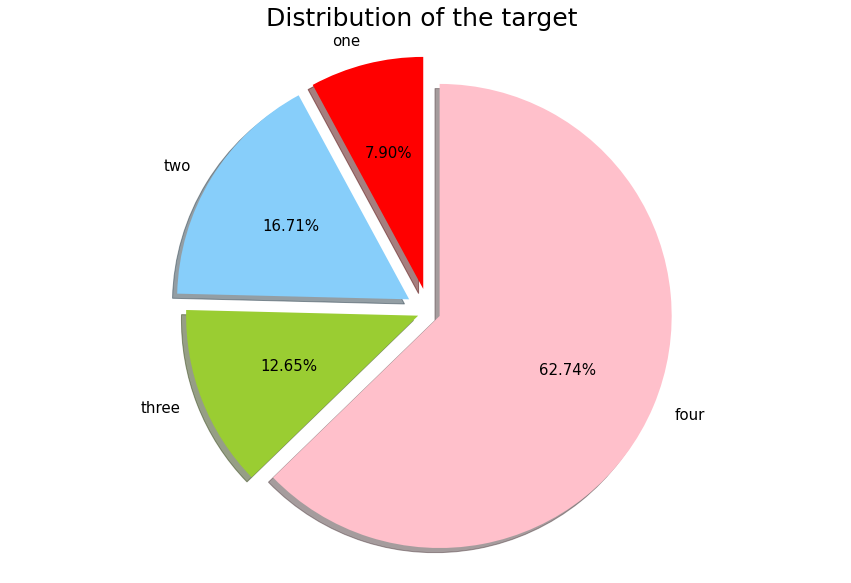

In [8]:
plt.figure(figsize = (15,10))
plt.pie([target_one, target_two, target_three, target_four], 
        explode=[0.1,0.1,0.05,0.05], # 간격 벌리는 값
        labels=['one', 'two', 'three', 'four'],  
        colors=['red', 'lightskyblue', 'yellowgreen', 'pink'], 
        autopct='%.2f%%',  # second decimal place
        shadow=True, 
        startangle=90, # 보기 좋게 돌리기
        textprops={'fontsize': 15}) # text font size

plt.axis('equal') #  equal length of X and Y axis
plt.title('Distribution of the target ', fontsize=25)

plt.show()

**Solution)** non-vulnerable households가 62.74%로 가장 많고, 그 다음이 16.71%로 moderate poverty, 12.65%로 vulnerable households, 7.90%로 extreme poverty 순서 인 것을 확인할 수 있었다.

#### Q3: Using the important features you selected in the previous section, determine the various distributions and statistics of those selected features. Determine if the results strengthen your selection.

In [29]:
train_csv['idhogar'].unique()

array(['21eb7fcc1', '0e5d7a658', '2c7317ea8', ..., 'a8eeafc29',
       '212db6f6c', 'd6c086aa3'], dtype=object)

In [43]:
train_csv['idhogar'].unique().shape   # 각 household의 수

(2988,)

In [44]:
train_csv['parentesco1'].sum()  # household head의 수

2973

In [45]:
train_csv['parentesco1']

0       1
1       1
2       1
3       0
4       0
       ..
9552    1
9553    0
9554    0
9555    0
9556    0
Name: parentesco1, Length: 9557, dtype: int64

In [561]:
train_csv = train_csv[train_csv['parentesco1'] == 1]
train_csv

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,ID_279628684,190000.0,0,3,0,1,1,0,NaN,0,...,100,1849,1,100,0,1.000000,0.000000,100.0000,1849,4
1,ID_f29eb3ddd,135000.0,0,4,0,1,1,1,1.0,0,...,144,4489,1,144,0,1.000000,64.000000,144.0000,4489,4
2,ID_68de51c94,NaN,0,8,0,1,1,0,NaN,0,...,121,8464,1,0,0,0.250000,64.000000,121.0000,8464,4
5,ID_ec05b1a7b,180000.0,0,5,0,1,1,1,1.0,0,...,121,1444,16,121,4,1.777778,1.000000,121.0000,1444,4
8,ID_1284f8aad,130000.0,1,2,0,1,1,0,NaN,0,...,81,900,16,81,4,16.000000,1.000000,100.0000,900,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9535,ID_18b0a845b,NaN,0,4,0,1,0,0,NaN,1,...,25,676,25,0,9,6.250000,2.250000,20.2500,676,1
9541,ID_a31274054,NaN,0,3,0,0,0,0,NaN,2,...,4,1600,25,4,9,6.250000,2.250000,16.0000,1600,2
9545,ID_32a00a8bf,46500.0,0,5,0,1,1,0,NaN,1,...,4,2025,25,4,4,5.444444,0.444444,100.0000,2025,4
9551,ID_79d39dddc,NaN,0,3,0,1,1,0,NaN,0,...,0,4489,4,0,0,4.000000,1.000000,9.0000,4489,2


In [586]:
test_csv = test_csv[test_csv['parentesco1'] == 1]
test_csv

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq
2,ID_e5442cf6a,NaN,0,5,0,1,1,0,NaN,1,...,41,289,1681,9,0,1,2.25,0.25,272.2500,1681
3,ID_a8db26a79,NaN,0,14,0,1,1,1,1.0,0,...,59,256,3481,1,256,0,1.00,0.00,256.0000,3481
4,ID_a62966799,175000.0,0,4,0,1,1,1,1.0,0,...,18,121,324,1,0,1,0.25,64.00,NaN,324
6,ID_3c5f4bd51,400000.0,0,3,0,1,1,1,1.0,0,...,42,121,1764,4,0,0,1.00,0.00,182.2500,1764
8,ID_472fa82da,300000.0,0,6,0,1,1,1,1.0,0,...,22,196,484,4,0,0,0.25,0.00,196.0000,484
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23836,ID_265b917e8,NaN,0,4,0,0,0,0,NaN,1,...,68,9,4624,4,0,1,1.00,64.00,9.0000,4624
23841,ID_19c0b1480,NaN,0,4,0,1,1,0,NaN,1,...,42,16,1764,36,16,16,9.00,4.00,25.0000,1764
23843,ID_aa256c594,NaN,0,5,0,1,1,0,NaN,0,...,47,0,2209,9,0,1,1.00,0.25,30.2500,2209
23847,ID_4b7feead3,NaN,1,2,1,1,1,0,NaN,0,...,57,25,3249,36,25,4,36.00,0.25,33.0625,3249


#### Q4: Create a correlation matrix and determine which features are most correlated with the target. Explain and discuss the findings.

In [47]:
corrmat = train_csv.corr()
corrmat

,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
v2a1,1.000000,-0.077309,0.427115,-0.057284,0.041299,0.103009,0.290376,0.285230,-0.069219,-0.000713,...,0.453701,0.029998,-0.047246,0.313209,-0.068319,-0.172610,-0.070604,0.387446,0.029998,0.259938
hacdor,-0.077309,1.000000,-0.181283,0.624324,-0.143713,-0.055073,-0.061309,-0.034382,0.186709,0.057368,...,-0.076154,-0.085488,0.280551,-0.054885,0.319831,0.753025,-0.022293,-0.066216,-0.085488,-0.136275
rooms,0.427115,-0.181283,1.000000,-0.172382,0.136410,0.158394,0.263738,0.178210,-0.039824,0.232702,...,0.251365,0.165341,0.212291,0.191689,0.026839,-0.304343,-0.016747,0.245894,0.165341,0.201019
hacapo,-0.057284,0.624324,-0.172382,1.000000,-0.154749,-0.062110,-0.051432,-0.019820,0.174432,0.088729,...,-0.071311,-0.050785,0.280245,-0.044957,0.285321,0.590724,-0.015812,-0.068848,-0.050785,-0.096313
v14a,0.041299,-0.143713,0.136410,-0.154749,1.000000,0.192954,0.029549,0.019820,-0.036434,0.019440,...,0.035839,0.027521,0.014963,0.023389,-0.007836,-0.117487,0.006917,0.036291,0.027521,0.068230
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SQBovercrowding,-0.172610,0.753025,-0.304343,0.590724,-0.117487,-0.060838,-0.087555,-0.017761,0.357841,0.175853,...,-0.149782,-0.208472,0.476532,-0.072770,0.468558,1.000000,-0.115918,-0.114123,-0.208472,-0.219318
SQBdependency,-0.070604,-0.022293,-0.016747,-0.015812,0.006917,-0.019616,-0.087584,-0.036037,-0.101348,-0.203032,...,-0.069007,0.488207,-0.190491,-0.045370,-0.055355,-0.115918,1.000000,-0.103141,0.488207,-0.054421
SQBmeaned,0.387446,-0.066216,0.245894,-0.068848,0.036291,0.112194,0.307390,0.119863,-0.041862,-0.047251,...,0.730339,-0.172289,-0.024393,0.448386,0.025293,-0.114123,-0.103141,1.000000,-0.172289,0.276251
agesq,0.029998,-0.085488,0.165341,-0.050785,0.027521,0.023903,-0.092440,-0.032834,-0.279595,0.013032,...,-0.175633,1.000000,-0.134267,-0.096749,-0.247050,-0.208472,0.488207,-0.172289,1.000000,0.012308


In [512]:
corrmat.sort_values(by='Target', ascending=False).T.tail(3)

,Target,escolari,meaneduc,SQBescolari,cielorazo,eviv3,epared3,SQBmeaned,pisomoscer,etecho3,...,parentesco3,parentesco4,parentesco5,parentesco6,parentesco7,parentesco8,parentesco9,parentesco10,parentesco11,parentesco12
SQBmeaned,0.276251,0.717281,0.944935,0.730339,0.268895,0.217502,0.251108,1.000000,0.225753,0.221398,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
agesq,0.012308,-0.246085,-0.229400,-0.175633,0.111298,0.036897,0.028912,-0.172289,0.100949,-0.007073,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Target,1.000000,0.333791,0.333652,0.314397,0.295249,0.293540,0.280947,0.276251,0.275452,0.261142,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Solution)** correlation matrix를 만들어서 확인해본결과, target과 관련이 많은 5개의 feature은 순서대로 escolari, meaneduc, SQBescolari, cielorazo, eviv3 이다. escolari은 학교 다닌 연수를 나타내고, meaneduc는 어른들의 평균 교육 기간을 나타내고, SQBescolari은 escolari feature의 제곱값을 나타내고, cielorazo은 집의 천장이 있는지 없는지를 나타내고, eviv3은 집의 바닥이 좋은지 안좋은지를 나타낸다.

#### Q5: Determine if there are there any possible outliers? (You might have to take a look at all features)

In [62]:
train_csv['escolari'].value_counts()

6     837
11    354
9     206
15    166
3     151
8     141
0     135
7     119
14    115
5     109
17     95
2      89
16     87
4      84
10     67
1      65
12     64
13     57
21     15
18      7
19      7
20      3
Name: escolari, dtype: int64

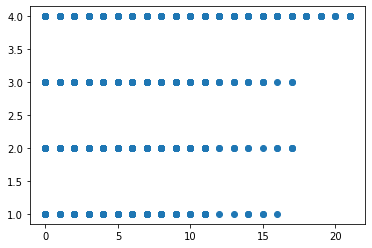

In [74]:
plt.scatter(train_csv['escolari'], train_csv['Target'])

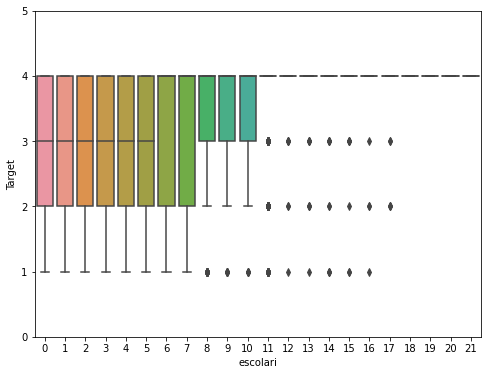

In [76]:
plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='escolari', y="Target", data=train_csv)
fig.axis(ymin=0, ymax=5);

In [63]:
train_csv['meaneduc'].value_counts()

6.000000     335
11.000000    172
9.000000     128
8.500000     105
10.000000    100
            ... 
5.400000       1
3.800000       1
9.200000       1
15.750000      1
5.833334       1
Name: meaneduc, Length: 155, dtype: int64

In [64]:
df = train_csv['meaneduc'].value_counts() == 1
df[df==True]

7.200000     True
27.000000    True
4.600000     True
7.875000     True
13.600000    True
0.333333     True
6.400000     True
13.800000    True
9.800000     True
17.666666    True
8.800000     True
7.800000     True
3.750000     True
9.600000     True
8.857142     True
5.571429     True
13.200000    True
4.200000     True
11.166667    True
9.571428     True
12.800000    True
37.000000    True
24.500000    True
23.500000    True
14.250000    True
32.000000    True
6.777778     True
9.400000     True
10.200000    True
11.400000    True
7.400000     True
3.200000     True
3.600000     True
6.285714     True
5.600000     True
14.200000    True
11.600000    True
7.777778     True
5.400000     True
3.800000     True
9.200000     True
15.750000    True
5.833334     True
Name: meaneduc, dtype: bool

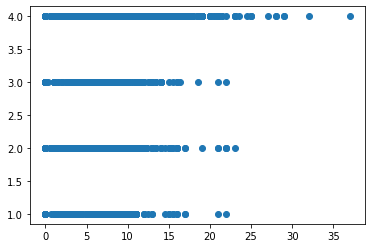

In [77]:
plt.scatter(train_csv['meaneduc'], train_csv['Target'])

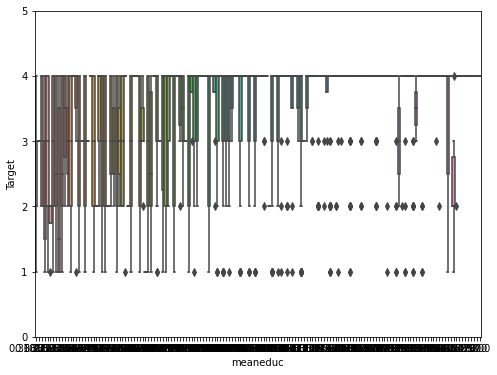

In [78]:
plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='meaneduc', y="Target", data=train_csv)
fig.axis(ymin=0, ymax=5);

In [65]:
train_csv['SQBescolari'].value_counts()

36     837
121    354
81     206
225    166
9      151
64     141
0      135
49     119
196    115
25     109
289     95
4       89
256     87
16      84
100     67
1       65
144     64
169     57
441     15
324      7
361      7
400      3
Name: SQBescolari, dtype: int64

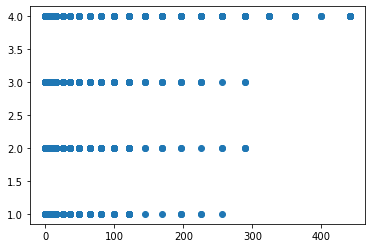

In [79]:
plt.scatter(train_csv['SQBescolari'], train_csv['Target'])

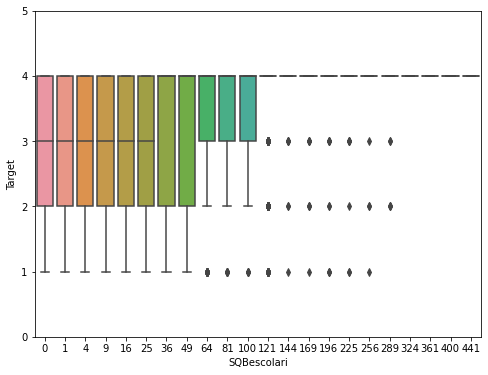

In [80]:
plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='SQBescolari', y="Target", data=train_csv)
fig.axis(ymin=0, ymax=5);

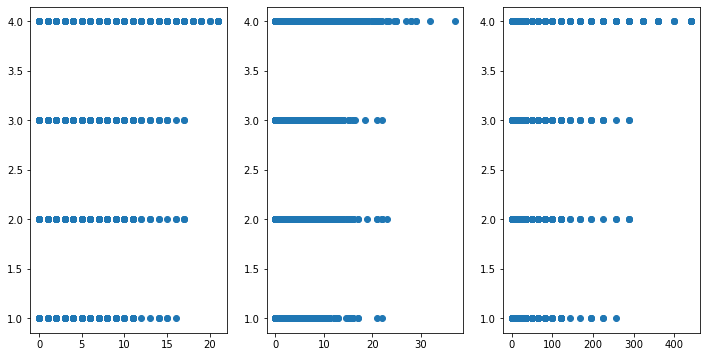

In [250]:
var1 = 'escolari'    # most significant nominal features
var2 = 'meaneduc'
var3 = 'SQBescolari'
plt.figure(figsize=(12,6))
plt.subplot(1, 3, 1)
plt.scatter(train_csv[var1], train_csv['Target'])
plt.subplot(1, 3, 2)
plt.scatter(train_csv[var2], train_csv['Target'])
plt.subplot(1, 3, 3)
plt.scatter(train_csv[var3], train_csv['Target'])

In [251]:
train_csv.sort_values(by='meaneduc', ascending=False)[:3]

,hacdor,rooms,hacapo,v14a,refrig,v18q,r4h1,r4h2,r4h3,r4m1,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
6166,0,5,0,1,1,0,0,0,0,0,...,225,1521,9,0,4,2.2500,4.0,1369.0,1521,4
9059,0,7,0,1,1,0,0,0,0,0,...,81,2601,9,0,4,0.5625,4.0,1024.0,2601,4
1832,0,4,0,1,1,0,0,0,0,0,...,256,1849,4,0,1,1.0000,1.0,841.0,1849,4


In [252]:
train_csv.sort_values(by='SQBescolari', ascending=False)[:3]  # 겹치는 point가 없다.

,hacdor,rooms,hacapo,v14a,refrig,v18q,r4h1,r4h2,r4h3,r4m1,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
2321,0,2,0,1,1,1,0,0,0,0,...,441,900,1,0,0,1.000000,0.0,441.00,900,4
7153,0,6,0,1,1,1,0,0,0,0,...,441,4900,1,0,0,0.111111,64.0,441.00,4900,4
2625,0,5,0,1,1,1,1,1,2,1,...,441,1600,16,441,4,4.000000,1.0,342.25,1600,4


In [66]:
train_csv['cielorazo'].value_counts()

1    2056
0     917
Name: cielorazo, dtype: int64

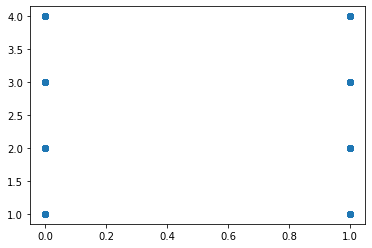

In [81]:
plt.scatter(train_csv['cielorazo'], train_csv['Target'])

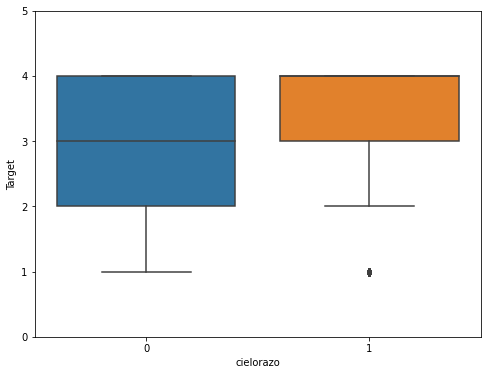

In [82]:
plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='cielorazo', y="Target", data=train_csv)
fig.axis(ymin=0, ymax=5);

In [67]:
train_csv['eviv3'].value_counts()

1    1950
0    1023
Name: eviv3, dtype: int64

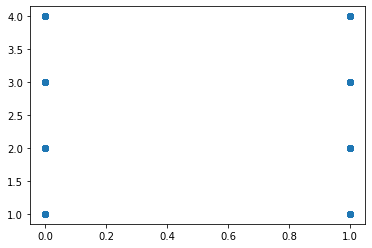

In [83]:
plt.scatter(train_csv['eviv3'], train_csv['Target'])

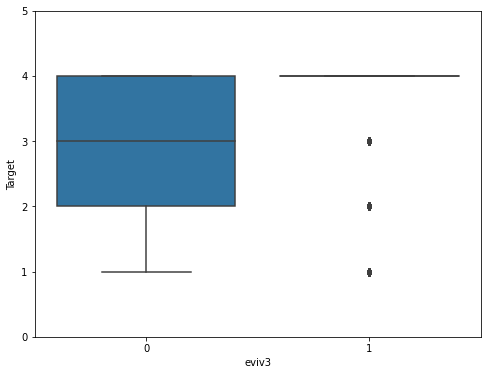

In [84]:
plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='eviv3', y="Target", data=train_csv)
fig.axis(ymin=0, ymax=5);

In [68]:
train_csv['epared3'].value_counts()

1    1748
0    1225
Name: epared3, dtype: int64

In [69]:
train_csv['SQBmeaned'].value_counts()

36.000000     335
121.000000    172
81.000000     128
72.250000     105
100.000000    100
             ... 
78.448975       1
312.111080      1
124.694450      1
14.440000       1
203.062500      1
Name: SQBmeaned, Length: 155, dtype: int64

In [70]:
df = train_csv['SQBmeaned'].value_counts() == 1
df[df==True]

10.240001      True
54.760002      True
174.239990     True
77.440002      True
129.959990     True
190.440000     True
134.560010     True
21.160000      True
34.027779      True
60.840004      True
1024.000000    True
62.015625      True
91.612236      True
31.359999      True
84.639999      True
45.938271      True
17.639997      True
248.062500     True
552.250000     True
729.000000     True
29.160002      True
163.840010     True
51.839996      True
39.510201      True
88.359993      True
14.062500      True
184.960010     True
40.960003      True
600.250000     True
96.040001      True
1369.000000    True
60.493824      True
201.640000     True
31.040819      True
12.959999      True
104.039990     True
0.111111       True
92.160004      True
78.448975      True
312.111080     True
124.694450     True
14.440000      True
203.062500     True
Name: SQBmeaned, dtype: bool

In [121]:
train_csv['dependency'].unique()  #dependency rate

array(['no', '8', 'yes', '3', '.5', '.25', '2', '.66666669', '.33333334',
       '1.5', '.40000001', '.75', '1.25', '.2', '2.5', '1.2', '4',
       '1.3333334', '2.25', '.22222222', '5', '.83333331', '.80000001',
       '6', '3.5', '1.6666666', '.2857143', '1.75', '.71428573',
       '.16666667', '.60000002'], dtype=object)

In [122]:
train_csv['edjefe'].unique() # male head 교육 받은 연수

array(['10', '12', 'no', '11', '9', '15', '4', '6', '8', '17', '7', '16',
       '14', '5', '21', '2', '19', 'yes', '3', '18', '13', '20'],
      dtype=object)

In [123]:
train_csv['edjefa'].unique()  # female head 교육 받은 연수

array(['no', '11', '4', '10', '9', '15', '7', '14', '13', '8', '17', '6',
       '5', '3', '16', '19', 'yes', '21', '12', '2', '20', '18'],
      dtype=object)

In [359]:
test_csv['dependency'].unique()  #dependency rate

array(['.5', 'no', '8', 'yes', '.25', '2', '.33333334', '.375',
       '.60000002', '1.5', '.2', '.75', '.66666669', '3', '.14285715',
       '.40000001', '.80000001', '1.6666666', '.2857143', '1.25', '2.5',
       '5', '.85714287', '1.3333334', '.16666667', '4', '.125',
       '.83333331', '2.3333333', '7', '1.2', '3.5', '2.25', '3.3333333',
       '6'], dtype=object)

In [360]:
test_csv['edjefe'].unique() # male head 교육 받은 연수

array(['no', '16', '10', '6', '11', '8', '13', '14', '5', '3', '9', '17',
       '15', '7', '21', '4', '12', '2', '20', 'yes', '19', '18'],
      dtype=object)

In [361]:
test_csv['edjefa'].unique()  # female head 교육 받은 연수

array(['17', 'no', '11', '14', '10', '15', '9', '6', '8', '3', '2', '5',
       '16', '12', 'yes', '7', '13', '21', '4', '19', '18', '20'],
      dtype=object)

# Part 3: Data preprocessing

### This step has to be in continuation with the data exploration step.

#### Q1: Determine how the outliers should be handled.

In [201]:
train_csv['dependency'].unique()  #dependency rate , object 타입이라 타입 바꾸어줘야 한다.

array(['no', '8', 'yes', '3', '.5', '.25', '2', '.66666669', '.33333334',
       '1.5', '.40000001', '.75', '1.25', '.2', '2.5', '1.2', '4',
       '1.3333334', '2.25', '.22222222', '5', '.83333331', '.80000001',
       '6', '3.5', '1.6666666', '.2857143', '1.75', '.71428573',
       '.16666667', '.60000002'], dtype=object)

In [202]:
train_csv['edjefe'].unique() # male head 교육 받은 연수 , object 타입이라 타입 바꾸어줘야 한다.

array(['10', '12', 'no', '11', '9', '15', '4', '6', '8', '17', '7', '16',
       '14', '5', '21', '2', '19', 'yes', '3', '18', '13', '20'],
      dtype=object)

In [203]:
train_csv['edjefa'].unique()  # female head 교육 받은 연수 , object 타입이라 타입 바꾸어줘야 한다.

array(['no', '11', '4', '10', '9', '15', '7', '14', '13', '8', '17', '6',
       '5', '3', '16', '19', 'yes', '21', '12', '2', '20', '18'],
      dtype=object)

In [562]:
train_csv['dependency'].replace('no','0',inplace=True)

In [563]:
train_csv['edjefe'].replace('no','0',inplace=True)

In [564]:
train_csv['edjefa'].replace('no','0',inplace=True)

In [565]:
train_csv['dependency'].replace('yes',np.nan,inplace=True)  # yes는 평균값으로 바꾸기 위해 임시로 NaN 값을 넣어준다.

In [566]:
train_csv['edjefe'].replace('yes',np.nan,inplace=True)  # yes는 평균값으로 바꾸기 위해 임시로 NaN 값을 넣어준다.

In [567]:
train_csv['edjefa'].replace('yes',np.nan,inplace=True)  # yes는 평균값으로 바꾸기 위해 임시로 NaN 값을 넣어준다.

In [568]:
train_csv = train_csv.astype({'dependency' : 'float'})
train_csv['dependency'].unique()

array([0.        , 8.        ,        nan, 3.        , 0.5       ,
       0.25      , 2.        , 0.66666669, 0.33333334, 1.5       ,
       0.40000001, 0.75      , 1.25      , 0.2       , 2.5       ,
       1.2       , 4.        , 1.3333334 , 2.25      , 0.22222222,
       5.        , 0.83333331, 0.80000001, 6.        , 3.5       ,
       1.6666666 , 0.2857143 , 1.75      , 0.71428573, 0.16666667,
       0.60000002])

In [569]:
train_csv = train_csv.astype({'edjefe' : 'float'})
train_csv['edjefe'].unique()

array([10., 12.,  0., 11.,  9., 15.,  4.,  6.,  8., 17.,  7., 16., 14.,
        5., 21.,  2., 19., nan,  3., 18., 13., 20.])

In [570]:
train_csv = train_csv.astype({'edjefa' : 'float'})
train_csv['edjefa'].unique()

array([ 0., 11.,  4., 10.,  9., 15.,  7., 14., 13.,  8., 17.,  6.,  5.,
        3., 16., 19., nan, 21., 12.,  2., 20., 18.])

In [571]:
mean = round(train_csv['dependency'].mean(),2) 
mean

1.43

In [572]:
train_csv['dependency'].replace(np.nan,mean,inplace=True)

In [573]:
mean = round(train_csv['edjefe'].mean(),2)
mean

5.03

In [574]:
train_csv['edjefe'].replace(np.nan,mean,inplace=True)

In [575]:
mean = round(train_csv['edjefa'].mean(),2)
mean

3.2

In [576]:
train_csv['edjefa'].replace(np.nan,mean,inplace=True)

In [540]:
train_csv['dependency'].unique()

array([0.        , 8.        , 1.43      , 3.        , 0.5       ,
       0.25      , 2.        , 0.66666669, 0.33333334, 1.5       ,
       0.40000001, 0.75      , 1.25      , 0.2       , 2.5       ,
       1.2       , 4.        , 1.3333334 , 2.25      , 0.22222222,
       5.        , 0.83333331, 0.80000001, 6.        , 3.5       ,
       1.6666666 , 0.2857143 , 1.75      , 0.71428573, 0.16666667,
       0.60000002])

In [317]:
train_csv['edjefe'].unique()

array([10.  , 12.  ,  0.  , 11.  ,  9.  , 15.  ,  4.  ,  6.  ,  8.  ,
       17.  ,  7.  , 16.  , 14.  ,  5.  , 21.  ,  2.  , 19.  ,  5.03,
        3.  , 18.  , 13.  , 20.  ])

In [318]:
train_csv['edjefa'].unique()

array([ 0. , 11. ,  4. , 10. ,  9. , 15. ,  7. , 14. , 13. ,  8. , 17. ,
        6. ,  5. ,  3. , 16. , 19. ,  3.2, 21. , 12. ,  2. , 20. , 18. ])

In [319]:
train_csv

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,ID_279628684,190000.0,0,3,0,1,1,0,NaN,0,...,100,1849,1,100,0,1.000000,0.000000,100.0000,1849,4
1,ID_f29eb3ddd,135000.0,0,4,0,1,1,1,1.0,0,...,144,4489,1,144,0,1.000000,64.000000,144.0000,4489,4
2,ID_68de51c94,NaN,0,8,0,1,1,0,NaN,0,...,121,8464,1,0,0,0.250000,64.000000,121.0000,8464,4
5,ID_ec05b1a7b,180000.0,0,5,0,1,1,1,1.0,0,...,121,1444,16,121,4,1.777778,1.000000,121.0000,1444,4
8,ID_1284f8aad,130000.0,1,2,0,1,1,0,NaN,0,...,81,900,16,81,4,16.000000,1.000000,100.0000,900,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9535,ID_18b0a845b,NaN,0,4,0,1,0,0,NaN,1,...,25,676,25,0,9,6.250000,2.250000,20.2500,676,1
9541,ID_a31274054,NaN,0,3,0,0,0,0,NaN,2,...,4,1600,25,4,9,6.250000,2.250000,16.0000,1600,2
9545,ID_32a00a8bf,46500.0,0,5,0,1,1,0,NaN,1,...,4,2025,25,4,4,5.444444,0.444444,100.0000,2025,4
9551,ID_79d39dddc,NaN,0,3,0,1,1,0,NaN,0,...,0,4489,4,0,0,4.000000,1.000000,9.0000,4489,2


In [587]:
test_csv['dependency'].replace('no','0',inplace=True)
test_csv['edjefe'].replace('no','0',inplace=True)
test_csv['edjefa'].replace('no','0',inplace=True)
test_csv['dependency'].replace('yes',np.nan,inplace=True)  # yes는 평균값으로 바꾸기 위해 임시로 NaN 값을 넣어준다.
test_csv['edjefe'].replace('yes',np.nan,inplace=True)  # yes는 평균값으로 바꾸기 위해 임시로 NaN 값을 넣어준다.
test_csv['edjefa'].replace('yes',np.nan,inplace=True)  # yes는 평균값으로 바꾸기 위해 임시로 NaN 값을 넣어준다.

In [588]:
test_csv = test_csv.astype({'dependency' : 'float'})
test_csv['dependency'].unique()

array([0.5       , 0.        , 8.        ,        nan, 0.25      ,
       2.        , 0.33333334, 0.375     , 0.60000002, 1.5       ,
       0.2       , 0.75      , 0.66666669, 3.        , 0.14285715,
       0.40000001, 0.80000001, 1.6666666 , 0.2857143 , 1.25      ,
       2.5       , 5.        , 0.85714287, 1.3333334 , 0.16666667,
       4.        , 0.125     , 0.83333331, 2.3333333 , 7.        ,
       1.2       , 3.5       , 2.25      , 3.3333333 , 6.        ])

In [589]:
test_csv = test_csv.astype({'edjefe' : 'float'})
test_csv['edjefe'].unique()

array([ 0., 16., 10.,  6., 11.,  8., 13., 14.,  5.,  3.,  9., 17., 15.,
        7., 21.,  4., 12.,  2., 20., nan, 19., 18.])

In [590]:
test_csv = test_csv.astype({'edjefa' : 'float'})
test_csv['edjefa'].unique()

array([17.,  0., 11., 14., 10., 15.,  9.,  6.,  8.,  3.,  2.,  5., 16.,
       12., nan,  7., 13., 21.,  4., 19., 18., 20.])

In [591]:
mean = round(test_csv['dependency'].mean(),2) 
mean

1.51

In [592]:
test_csv['dependency'].replace(np.nan,mean,inplace=True)

In [593]:
mean = round(test_csv['edjefe'].mean(),2)
mean

5.06

In [594]:
test_csv['edjefe'].replace(np.nan,mean,inplace=True)

In [595]:
mean = round(test_csv['edjefa'].mean(),2)
mean

3.09

In [596]:
test_csv['edjefa'].replace(np.nan,mean,inplace=True)

In [597]:
test_csv['dependency'].unique()

array([0.5       , 0.        , 8.        , 1.51      , 0.25      ,
       2.        , 0.33333334, 0.375     , 0.60000002, 1.5       ,
       0.2       , 0.75      , 0.66666669, 3.        , 0.14285715,
       0.40000001, 0.80000001, 1.6666666 , 0.2857143 , 1.25      ,
       2.5       , 5.        , 0.85714287, 1.3333334 , 0.16666667,
       4.        , 0.125     , 0.83333331, 2.3333333 , 7.        ,
       1.2       , 3.5       , 2.25      , 3.3333333 , 6.        ])

In [373]:
test_csv['edjefe'].unique()

array([ 0.  , 16.  , 10.  ,  6.  , 11.  ,  8.  , 13.  , 14.  ,  5.  ,
        3.  ,  9.  , 17.  , 15.  ,  7.  , 21.  ,  4.  , 12.  ,  2.  ,
       20.  ,  5.06, 19.  , 18.  ])

In [374]:
test_csv['edjefa'].unique()

array([17.  ,  0.  , 11.  , 14.  , 10.  , 15.  ,  9.  ,  6.  ,  8.  ,
        3.  ,  2.  ,  5.  , 16.  , 12.  ,  3.09,  7.  , 13.  , 21.  ,
        4.  , 19.  , 18.  , 20.  ])

In [541]:
test_csv

,hacdor,rooms,hacapo,v14a,refrig,v18q,r4h1,r4h2,r4h3,r4m1,...,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq
2,0,5,0,1,1,0,1,1,2,0,...,41,289,1681,9,0,1,2.25,0.25,272.250000,1681
3,0,14,0,1,1,1,0,1,1,0,...,59,256,3481,1,256,0,1.00,0.00,256.000000,3481
4,0,4,0,1,1,1,0,0,0,0,...,18,121,324,1,0,1,0.25,64.00,100.017252,324
6,0,3,0,1,1,1,0,0,0,0,...,42,121,1764,4,0,0,1.00,0.00,182.250000,1764
8,0,6,0,1,1,1,0,0,0,0,...,22,196,484,4,0,0,0.25,0.00,196.000000,484
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23836,0,4,0,0,0,0,1,0,1,0,...,68,9,4624,4,0,1,1.00,64.00,9.000000,4624
23841,0,4,0,1,1,0,1,1,2,1,...,42,16,1764,36,16,16,9.00,4.00,25.000000,1764
23843,0,5,0,1,1,0,0,1,1,0,...,47,0,2209,9,0,1,1.00,0.25,30.250000,2209
23847,1,2,1,1,1,0,0,2,2,1,...,57,25,3249,36,25,4,36.00,0.25,33.062500,3249


#### Q2: Explore if there are any missing values in the data.

In [577]:
train_csv.isna().sum().sort_values(ascending=False)

rez_esc        2972
v18q1          2318
v2a1           2156
meaneduc          3
SQBmeaned         3
               ... 
hogar_total       0
dependency        0
edjefe            0
edjefa            0
Id                0
Length: 143, dtype: int64

In [578]:
df = train_csv.isna().sum().sort_values(ascending=False)>0
df[df == True]  # 5개가 True이니까 5개의 feature만 missing value를 처리해주면 된다.

rez_esc      True
v18q1        True
v2a1         True
meaneduc     True
SQBmeaned    True
dtype: bool

In [598]:
test_csv.isna().sum().sort_values(ascending=False)

rez_esc       7330
v18q1         5726
v2a1          5400
SQBmeaned       17
meaneduc        17
              ... 
dependency       0
edjefe           0
edjefa           0
instlevel1       0
Id               0
Length: 142, dtype: int64

In [599]:
df2 = test_csv.isna().sum().sort_values(ascending=False)>0
df2[df2 == True]  # 5개가 True이니까 5개의 feature만 missing value를 처리해주면 된다.

rez_esc      True
v18q1        True
v2a1         True
SQBmeaned    True
meaneduc     True
dtype: bool

#### Q3: Determine how these missing values should be handled.

In [579]:
train_csv[['rez_esc','v18q1','v2a1','meaneduc','SQBmeaned']]

,rez_esc,v18q1,v2a1,meaneduc,SQBmeaned
0,NaN,NaN,190000.0,10.00,100.0000
1,NaN,1.0,135000.0,12.00,144.0000
2,NaN,NaN,NaN,11.00,121.0000
5,NaN,1.0,180000.0,11.00,121.0000
8,NaN,NaN,130000.0,10.00,100.0000
...,...,...,...,...,...
9535,NaN,NaN,NaN,4.50,20.2500
9541,NaN,NaN,NaN,4.00,16.0000
9545,NaN,NaN,46500.0,10.00,100.0000
9551,NaN,NaN,NaN,3.00,9.0000


In [580]:
train_df = train_csv.drop(['rez_esc','v18q1','v2a1'], axis=1)
train_df

,Id,hacdor,rooms,hacapo,v14a,refrig,v18q,r4h1,r4h2,r4h3,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,ID_279628684,0,3,0,1,1,0,0,1,1,...,100,1849,1,100,0,1.000000,0.000000,100.0000,1849,4
1,ID_f29eb3ddd,0,4,0,1,1,1,0,1,1,...,144,4489,1,144,0,1.000000,64.000000,144.0000,4489,4
2,ID_68de51c94,0,8,0,1,1,0,0,0,0,...,121,8464,1,0,0,0.250000,64.000000,121.0000,8464,4
5,ID_ec05b1a7b,0,5,0,1,1,1,0,2,2,...,121,1444,16,121,4,1.777778,1.000000,121.0000,1444,4
8,ID_1284f8aad,1,2,0,1,1,0,0,1,1,...,81,900,16,81,4,16.000000,1.000000,100.0000,900,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9535,ID_18b0a845b,0,4,0,1,0,0,1,1,2,...,25,676,25,0,9,6.250000,2.250000,20.2500,676,1
9541,ID_a31274054,0,3,0,0,0,0,2,2,4,...,4,1600,25,4,9,6.250000,2.250000,16.0000,1600,2
9545,ID_32a00a8bf,0,5,0,1,1,0,1,2,3,...,4,2025,25,4,4,5.444444,0.444444,100.0000,2025,4
9551,ID_79d39dddc,0,3,0,1,1,0,0,1,1,...,0,4489,4,0,0,4.000000,1.000000,9.0000,4489,2


In [582]:
train_df= train_df.dropna(axis=0)
train_df

,Id,hacdor,rooms,hacapo,v14a,refrig,v18q,r4h1,r4h2,r4h3,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,ID_279628684,0,3,0,1,1,0,0,1,1,...,100,1849,1,100,0,1.000000,0.000000,100.0000,1849,4
1,ID_f29eb3ddd,0,4,0,1,1,1,0,1,1,...,144,4489,1,144,0,1.000000,64.000000,144.0000,4489,4
2,ID_68de51c94,0,8,0,1,1,0,0,0,0,...,121,8464,1,0,0,0.250000,64.000000,121.0000,8464,4
5,ID_ec05b1a7b,0,5,0,1,1,1,0,2,2,...,121,1444,16,121,4,1.777778,1.000000,121.0000,1444,4
8,ID_1284f8aad,1,2,0,1,1,0,0,1,1,...,81,900,16,81,4,16.000000,1.000000,100.0000,900,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9535,ID_18b0a845b,0,4,0,1,0,0,1,1,2,...,25,676,25,0,9,6.250000,2.250000,20.2500,676,1
9541,ID_a31274054,0,3,0,0,0,0,2,2,4,...,4,1600,25,4,9,6.250000,2.250000,16.0000,1600,2
9545,ID_32a00a8bf,0,5,0,1,1,0,1,2,3,...,4,2025,25,4,4,5.444444,0.444444,100.0000,2025,4
9551,ID_79d39dddc,0,3,0,1,1,0,0,1,1,...,0,4489,4,0,0,4.000000,1.000000,9.0000,4489,2


In [583]:
train_df.isna().sum().sort_values(ascending=False)  # missing value가 없는 것을 확인 할 수 있다.

Target        0
planpri       0
sanitario5    0
sanitario3    0
sanitario2    0
             ..
edjefa        0
meaneduc      0
instlevel1    0
instlevel2    0
Id            0
Length: 140, dtype: int64

In [584]:
train_csv = train_df
train_csv

,Id,hacdor,rooms,hacapo,v14a,refrig,v18q,r4h1,r4h2,r4h3,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,ID_279628684,0,3,0,1,1,0,0,1,1,...,100,1849,1,100,0,1.000000,0.000000,100.0000,1849,4
1,ID_f29eb3ddd,0,4,0,1,1,1,0,1,1,...,144,4489,1,144,0,1.000000,64.000000,144.0000,4489,4
2,ID_68de51c94,0,8,0,1,1,0,0,0,0,...,121,8464,1,0,0,0.250000,64.000000,121.0000,8464,4
5,ID_ec05b1a7b,0,5,0,1,1,1,0,2,2,...,121,1444,16,121,4,1.777778,1.000000,121.0000,1444,4
8,ID_1284f8aad,1,2,0,1,1,0,0,1,1,...,81,900,16,81,4,16.000000,1.000000,100.0000,900,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9535,ID_18b0a845b,0,4,0,1,0,0,1,1,2,...,25,676,25,0,9,6.250000,2.250000,20.2500,676,1
9541,ID_a31274054,0,3,0,0,0,0,2,2,4,...,4,1600,25,4,9,6.250000,2.250000,16.0000,1600,2
9545,ID_32a00a8bf,0,5,0,1,1,0,1,2,3,...,4,2025,25,4,4,5.444444,0.444444,100.0000,2025,4
9551,ID_79d39dddc,0,3,0,1,1,0,0,1,1,...,0,4489,4,0,0,4.000000,1.000000,9.0000,4489,2


In [600]:
test_csv[['rez_esc','v18q1','v2a1','meaneduc','SQBmeaned']]

,rez_esc,v18q1,v2a1,meaneduc,SQBmeaned
2,NaN,NaN,NaN,16.50,272.2500
3,NaN,1.0,NaN,16.00,256.0000
4,NaN,1.0,175000.0,NaN,NaN
6,NaN,1.0,400000.0,13.50,182.2500
8,NaN,1.0,300000.0,14.00,196.0000
...,...,...,...,...,...
23836,NaN,NaN,NaN,3.00,9.0000
23841,NaN,NaN,NaN,5.00,25.0000
23843,NaN,NaN,NaN,5.50,30.2500
23847,NaN,NaN,NaN,5.75,33.0625


In [601]:
test_csv = test_csv.drop(['rez_esc','v18q1','v2a1'], axis=1)
test_csv.shape

(7334, 139)

In [602]:
test_csv= test_csv.dropna(axis=0)
test_csv

,Id,hacdor,rooms,hacapo,v14a,refrig,v18q,r4h1,r4h2,r4h3,...,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq
2,ID_e5442cf6a,0,5,0,1,1,0,1,1,2,...,41,289,1681,9,0,1,2.250000,0.25,272.2500,1681
3,ID_a8db26a79,0,14,0,1,1,1,0,1,1,...,59,256,3481,1,256,0,1.000000,0.00,256.0000,3481
6,ID_3c5f4bd51,0,3,0,1,1,1,0,0,0,...,42,121,1764,4,0,0,1.000000,0.00,182.2500,1764
8,ID_472fa82da,0,6,0,1,1,1,0,0,0,...,22,196,484,4,0,0,0.250000,0.00,196.0000,484
9,ID_24864adcc,0,6,0,1,1,0,0,0,0,...,70,100,4900,1,0,0,0.111111,64.00,100.0000,4900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23836,ID_265b917e8,0,4,0,0,0,0,1,0,1,...,68,9,4624,4,0,1,1.000000,64.00,9.0000,4624
23841,ID_19c0b1480,0,4,0,1,1,0,1,1,2,...,42,16,1764,36,16,16,9.000000,4.00,25.0000,1764
23843,ID_aa256c594,0,5,0,1,1,0,0,1,1,...,47,0,2209,9,0,1,1.000000,0.25,30.2500,2209
23847,ID_4b7feead3,1,2,1,1,1,0,0,2,2,...,57,25,3249,36,25,4,36.000000,0.25,33.0625,3249


In [603]:
test_csv.isna().sum().sort_values(ascending=False)  # missing value가 없는 것을 확인 할 수 있다.

agesq         0
planpri       0
sanitario5    0
sanitario3    0
sanitario2    0
             ..
edjefe        0
edjefa        0
meaneduc      0
instlevel1    0
Id            0
Length: 139, dtype: int64

#### Q4: Determine if some features need some labelling. Are there any other conversion of representation needed?

In [604]:
train_csv.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2970 entries, 0 to 9552
Columns: 140 entries, Id to Target
dtypes: float64(8), int64(130), object(2)
memory usage: 3.2+ MB


In [605]:
df = (train_csv.dtypes == object)
df[df == True]

Id         True
idhogar    True
dtype: bool

In [606]:
train_csv.drop('Id',axis=1, inplace=True)
train_csv.drop('idhogar',axis=1, inplace=True)
train_csv

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,hacdor,rooms,hacapo,v14a,refrig,v18q,r4h1,r4h2,r4h3,r4m1,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,0,3,0,1,1,0,0,1,1,0,...,100,1849,1,100,0,1.000000,0.000000,100.0000,1849,4
1,0,4,0,1,1,1,0,1,1,0,...,144,4489,1,144,0,1.000000,64.000000,144.0000,4489,4
2,0,8,0,1,1,0,0,0,0,0,...,121,8464,1,0,0,0.250000,64.000000,121.0000,8464,4
5,0,5,0,1,1,1,0,2,2,1,...,121,1444,16,121,4,1.777778,1.000000,121.0000,1444,4
8,1,2,0,1,1,0,0,1,1,2,...,81,900,16,81,4,16.000000,1.000000,100.0000,900,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9535,0,4,0,1,0,0,1,1,2,2,...,25,676,25,0,9,6.250000,2.250000,20.2500,676,1
9541,0,3,0,0,0,0,2,2,4,0,...,4,1600,25,4,9,6.250000,2.250000,16.0000,1600,2
9545,0,5,0,1,1,0,1,2,3,0,...,4,2025,25,4,4,5.444444,0.444444,100.0000,2025,4
9551,0,3,0,1,1,0,0,1,1,0,...,0,4489,4,0,0,4.000000,1.000000,9.0000,4489,2


In [607]:
test_csv.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7317 entries, 2 to 23852
Columns: 139 entries, Id to agesq
dtypes: float64(8), int64(129), object(2)
memory usage: 7.8+ MB


In [608]:
df2 = (test_csv.dtypes == object)
df2[df2 == True]

Id         True
idhogar    True
dtype: bool

In [609]:
test_csv.drop('Id',axis=1, inplace=True)
test_csv.drop('idhogar',axis=1, inplace=True)
test_csv

,hacdor,rooms,hacapo,v14a,refrig,v18q,r4h1,r4h2,r4h3,r4m1,...,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq
2,0,5,0,1,1,0,1,1,2,0,...,41,289,1681,9,0,1,2.250000,0.25,272.2500,1681
3,0,14,0,1,1,1,0,1,1,0,...,59,256,3481,1,256,0,1.000000,0.00,256.0000,3481
6,0,3,0,1,1,1,0,0,0,0,...,42,121,1764,4,0,0,1.000000,0.00,182.2500,1764
8,0,6,0,1,1,1,0,0,0,0,...,22,196,484,4,0,0,0.250000,0.00,196.0000,484
9,0,6,0,1,1,0,0,0,0,0,...,70,100,4900,1,0,0,0.111111,64.00,100.0000,4900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23836,0,4,0,0,0,0,1,0,1,0,...,68,9,4624,4,0,1,1.000000,64.00,9.0000,4624
23841,0,4,0,1,1,0,1,1,2,1,...,42,16,1764,36,16,16,9.000000,4.00,25.0000,1764
23843,0,5,0,1,1,0,0,1,1,0,...,47,0,2209,9,0,1,1.000000,0.25,30.2500,2209
23847,1,2,1,1,1,0,0,2,2,1,...,57,25,3249,36,25,4,36.000000,0.25,33.0625,3249


#### Q5: Determine if some feature engineering can be done and perform them as determined.

In [610]:
train_csv.shape

(2970, 138)

In [611]:
train_csv.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2970 entries, 0 to 9552
Columns: 138 entries, hacdor to Target
dtypes: float64(8), int64(130)
memory usage: 3.1 MB


In [612]:
test_csv.shape

(7317, 137)

In [613]:
test_csv.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7317 entries, 2 to 23852
Columns: 137 entries, hacdor to agesq
dtypes: float64(8), int64(129)
memory usage: 7.7 MB


# Part 4: Machine learning implementation

### Once the data has been satisfactorily preprocessed, implement it onto machine learning models.

#### Q1: Scale the preprocessed data if needed.

In [614]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = train_csv.values[:,:-1]
X_scaled = scaler.fit_transform(X)  

In [615]:
y = train_csv.values[:,-1]
y.shape

(2970,)

In [616]:
X_test = test_csv.values[:,:]
X_test_scaled = scaler.fit_transform(X_test) 

#### Q2: Split the data into train and validation sets

In [678]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.3, random_state=25)    # PCA 사용하지 않음.

In [679]:
X_train.shape, y_train.shape

((2079, 137), (2079,))

In [683]:
from sklearn.decomposition import PCA 

pca = PCA(n_components=20)
pca_result = pca.fit_transform(X_scaled)
X_train2, X_val2, y_train2, y_val2 = train_test_split(pca_result, y, test_size=0.3, random_state=25)   # PCA 사용

In [684]:
X_train2.shape, y_train2.shape

((2079, 20), (2079,))

#### Q3: Determine the machine learning models to be used and perform them. (Apply K-Fold cross validation or any other methods to improve the results.)

In [623]:
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

clf = SGDClassifier()
clf.fit(X_train, y_train)
print("Linear Reg score: {:.2f}".format(clf.score(X_val, y_val)))

Linear Reg score: 0.64


In [685]:
clf = SGDClassifier()
clf.fit(X_train2, y_train2)
print("Linear Reg score: {:.2f}".format(clf.score(X_val2, y_val2)))

Linear Reg score: 0.63


In [624]:
for k in range(1,10):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    print("K가", k, "일때 정확도: {:.2f}".format(knn.score(X_val, y_val)))

K가 1 일때 정확도: 0.57
K가 2 일때 정확도: 0.50
K가 3 일때 정확도: 0.60
K가 4 일때 정확도: 0.61
K가 5 일때 정확도: 0.62
K가 6 일때 정확도: 0.63
K가 7 일때 정확도: 0.63
K가 8 일때 정확도: 0.63
K가 9 일때 정확도: 0.64


In [686]:
for k in range(1,10):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train2,y_train2)
    print("K가", k, "일때 정확도: {:.2f}".format(knn.score(X_val2, y_val2)))

K가 1 일때 정확도: 0.58
K가 2 일때 정확도: 0.50
K가 3 일때 정확도: 0.60
K가 4 일때 정확도: 0.61
K가 5 일때 정확도: 0.63
K가 6 일때 정확도: 0.63
K가 7 일때 정확도: 0.64
K가 8 일때 정확도: 0.65
K가 9 일때 정확도: 0.65


In [680]:
for k in range(1,10):
    tree = DecisionTreeClassifier(max_depth = k)
    tree.fit(X_train, y_train)
    print("max_depth이", k, "일때 정확도: {:.2f}".format(tree.score(X_val, y_val)))

max_depth이 1 일때 정확도: 0.66
max_depth이 2 일때 정확도: 0.66
max_depth이 3 일때 정확도: 0.67
max_depth이 4 일때 정확도: 0.66
max_depth이 5 일때 정확도: 0.66
max_depth이 6 일때 정확도: 0.66
max_depth이 7 일때 정확도: 0.65
max_depth이 8 일때 정확도: 0.64
max_depth이 9 일때 정확도: 0.63


In [675]:
for k in range(1,10):
    tree = DecisionTreeClassifier(max_depth = k)
    tree.fit(X_train2, y_train2)
    print("max_depth이", k, "일때 정확도: {:.2f}".format(tree.score(X_val2, y_val2)))

max_depth이 1 일때 정확도: 0.65
max_depth이 2 일때 정확도: 0.65
max_depth이 3 일때 정확도: 0.66
max_depth이 4 일때 정확도: 0.65
max_depth이 5 일때 정확도: 0.65
max_depth이 6 일때 정확도: 0.64
max_depth이 7 일때 정확도: 0.63
max_depth이 8 일때 정확도: 0.62
max_depth이 9 일때 정확도: 0.61


In [656]:
rfc = RandomForestClassifier(n_estimators=500)  # The number of trees : 500
rfc.fit(X_train, y_train)
print("랜덤포레스트 정확도: {:.4f}".format(rfc.score(X_val, y_val)))

랜덤포레스트 정확도: 0.6768


In [688]:
rfc = RandomForestClassifier(n_estimators=500)  # The number of trees : 500
rfc.fit(X_train2, y_train2)
print("랜덤포레스트 정확도: {:.4f}".format(rfc.score(X_val2, y_val2)))

랜덤포레스트 정확도: 0.6655


##### K-Fold cross validation 사용

In [657]:
cross_val_score(clf, X, y, cv=5).mean().round(4)  #  SGDClassifier() 

0.5192

In [658]:
cross_val_score(clf, pca_result, y, cv=5).mean().round(4)  #  SGDClassifier() 

0.6017

In [664]:
cross_val_score(clf, X_scaled , y, cv=5).mean().round(4)  #  SGDClassifier() 

0.4933

In [665]:
cross_val_score(knn, X, y, cv=5).mean().round(4)  #  KNeighborsClassifier

0.6175

In [666]:
cross_val_score(knn, pca_result, y, cv=5).mean().round(4)  #  KNeighborsClassifier

0.6303

In [667]:
cross_val_score(knn, X_scaled, y, cv=5).mean().round(4)  #  KNeighborsClassifier

0.6266

In [668]:
cross_val_score(tree, X, y, cv=5).mean().round(4)  #   DecisionTreeClassifier

0.5273

In [641]:
cross_val_score(tree, pca_result, y, cv=5).mean().round(4)  #   DecisionTreeClassifier

0.5269

In [669]:
cross_val_score(tree, X_scaled , y, cv=5).mean().round(4)  #   DecisionTreeClassifier

0.5249

In [670]:
cross_val_score(rfc, X, y, cv=5).mean().round(4)  #  RandomForestClassifier

0.6589

In [671]:
cross_val_score(rfc, pca_result, y, cv=5).mean().round(4)  #  RandomForestClassifier

0.6455

In [672]:
cross_val_score(rfc, X_scaled, y, cv=5).mean().round(4)  #  RandomForestClassifier

0.6519

# Part 5: Performance evaluation

#### Q1: Determine the results.

In [673]:
Y_pred1=clf.predict(X_test_scaled)
Y_pred1=pd.Series(Y_pred1)
Y_pred1.value_counts()

4.0    5103
2.0    1021
3.0     731
1.0     462
dtype: int64

In [486]:
Y_pred2=knn.predict(X_test_scaled)
Y_pred2=pd.Series(Y_pred2)
Y_pred2.value_counts()

4.0    6471
2.0     433
3.0     279
1.0     151
dtype: int64

In [487]:
Y_pred2=knn.predict_proba(X_test_scaled).round(3)
Y_pred2[:10]

array([[0.   , 0.   , 0.   , 1.   ],
       [0.   , 0.   , 0.   , 1.   ],
       [0.   , 0.222, 0.111, 0.667],
       [0.   , 0.111, 0.111, 0.778],
       [0.   , 0.   , 0.   , 1.   ],
       [0.   , 0.111, 0.   , 0.889],
       [0.   , 0.   , 0.   , 1.   ],
       [0.   , 0.   , 0.   , 1.   ],
       [0.   , 0.   , 0.222, 0.778],
       [0.111, 0.111, 0.   , 0.778]])

In [681]:
Y_pred3=tree.predict(X_test_scaled)
Y_pred3=pd.Series(Y_pred3)
Y_pred3.value_counts()

4.0    5188
3.0     962
2.0     839
1.0     328
dtype: int64

In [490]:
Y_pred3=tree.predict_proba(X_test_scaled).round(3)
Y_pred3[:10]

array([[0.   , 0.   , 0.   , 1.   ],
       [0.   , 0.   , 0.   , 1.   ],
       [0.   , 1.   , 0.   , 0.   ],
       [0.   , 0.   , 0.   , 1.   ],
       [0.   , 0.   , 0.   , 1.   ],
       [0.023, 0.045, 0.028, 0.903],
       [0.   , 0.   , 0.   , 1.   ],
       [0.   , 0.069, 0.   , 0.931],
       [0.12 , 0.   , 0.   , 0.88 ],
       [0.   , 0.   , 0.   , 1.   ]])

In [682]:
Y_pred4=rfc.predict(X_test_scaled)
Y_pred4=pd.Series(Y_pred4)
Y_pred4.value_counts()

4.0    6399
2.0     605
3.0     172
1.0     141
dtype: int64

In [496]:
Y_pred4=rfc.predict_proba(X_test_scaled).round(3)
Y_pred4[:10]

array([[0.004, 0.008, 0.026, 0.962],
       [0.012, 0.002, 0.   , 0.986],
       [0.062, 0.152, 0.1  , 0.686],
       [0.04 , 0.078, 0.072, 0.81 ],
       [0.   , 0.076, 0.004, 0.92 ],
       [0.004, 0.064, 0.036, 0.896],
       [0.012, 0.054, 0.018, 0.916],
       [0.022, 0.12 , 0.124, 0.734],
       [0.064, 0.078, 0.046, 0.812],
       [0.062, 0.312, 0.102, 0.524]])

#### Q2: Explain the implementations of the results.

SGDClassifier, KNeighborsClassifier, DecisionTreeClassifier, RandomForestClassifier 총 4개의 machine learning model을 각각 사용하여 train data로 훈련한 후, test data로 target 값을 예측해보았다. 모델마다 조금씩 차이가 있었지만, 랜덤포레스트 모델과, KNN 모델의 예측값이 가장 비슷하였다. train 과정에서도 accuracy가 **67.68%** 로 랜덤포레스트 모델이 가장 좋았기 때문에 제일 믿을 수 있을 것 같다. predict를 사용해서 hard decision을 내린 결과 값을 확인할 수 있었고, predict_proba를 통해서 soft decision을 내린 결과 값을 확인 할 수 있었다.

#### Q3: Determine if the results are satisfactory, and determine if improvements need to be made.

test data set에 target 값이 없기 때문에 test data에 대한 accuracy는 구하지 못할 것 같다. 그래서 target값을 예측해보았다.
머신러닝 모델 훈련과정에서는 가장 높은 accuracy가 **67.68%** 가 나왔는데, outlier 처리를 조금 더 잘했으면 더 높은 accuracy가 나왔을 것 같다.

#### Q4: If improvements need to be made, state the sections that improvements will be made and explain why.

3번 section에서 outlier와 missing value를 처리하는데 더 많은 시간을 사용해야 될 것 같다. 왜냐하면 모델, 특히 머신러닝 모델에서는 하이퍼파라미터로 바꿀 수 있는 것이 제한적이기 때문에 data를 전처리하는데 시간을 더 많이 사용하고, 알맞은 data 형태로 전처리 하는 것이 더 중요한 것 같다. 딥러닝 모델을 사용했을때는 오버피팅이 되지 않을 정도로 hidden layer의 깊이를 조금 깊게하고 전이학습 등을 사용한다면 조금 더 높은 정확도가 나올 것 같다. 4번 section에서는 PCA를 사용하여 principal feature만 뽑아내어 훈련과 예측을 진행해보았는데 비슷한 결과 값이 나왔다.

#### Q5: Determine and explain the limitations of your implementation.

train data set이 부족한게 가장 큰 것 같다. 그리고 test data set의 개수가 train data set의 개수보다 많았는데, 보통은 train data 개수가 더 많아야하는데 data set이 이렇게 주어져있어서 한참 고민을 해보았다. 모델로는 머신러닝 모델을 사용했는데, 퍼셉트론을 사용한 딥러닝 모델로 학습을 한다면 accuracy가 조금 더 올라갈 것 같다.

# Part 6: Conclusion

#### Q1: Conclude the data science model that you have created.

##### Data exploration
household의 head로만 예측하기 위해 'parentesco1' feature가 1인 row만 사용하였다. correlation matrix를 만들어서 확인해본 결과, target과 관련이 많은 5개의 feature은 순서대로 escolari, meaneduc, SQBescolari, cielorazo, eviv3 이였다. escolari은 학교 다닌 연수를 나타내고, meaneduc는 어른들의 평균 교육 기간을 나타내고, SQBescolari은 escolari feature의 제곱값을 나타내고, cielorazo은 집의 천장이 있는지 없는지를 나타내고, eviv3은 집의 바닥이 좋은지 안좋은지를 나타낸다. 

##### Data preprocessing
숫자와 'yes', 'no'가 같이 있는 feature 3개('dependency', 'edjefe', 'edjefa')를 처리해주었는데, 'no'는 0으로 'yes'는 feature의 평균 값으로 대체해주었다. missing value가 있는 feature는 5개가 있었는데, 너무 많은 missing value가 있는 feature 3개('rez_esc','v18q1','v2a1') 는 삭제해주었고, 나머지 두개 feature('meaneduc','SQBmeaned')는 평균 값으로 대체해주었다. 처음에는 평균 값으로 대체해주었는데, feature('meaneduc','SQBmeaned')가 Target과 correlation이 높은 편인데 함부로 평균값을 넣어서 정확도가 낮아진 것 같아서 삭제해주었다. 그리고 object type feature가 2개('Id', 'idhogar') 있었는데 개인들을 구별해주고, household를 구별해주는 것이라 삭제해주었다.

##### Machine learning implementation
StandardScaler를 사용하여 scaling해주고 3가지의 방법으로 데이터셋을 표현하였다. 첫 번째는 7:3의 비율로 train, validation set을 나누어주었다. 두 번째는 K-Fold cross validation 방법을 사용하였고, 세 번째는 PCA를 사용하여 주요한 20개의 feature만 뽑아내어 7:3의 비율로 train, validation set을 나누어주었다. 머신러닝 모델로는 SGDClassifier, KNeighborsClassifier, DecisionTreeClassifier, RandomForestClassifier 총 4개의 model로 각각 진행해보았다. KNeighborsClassifier를 사용할 때는 K값을 1부터 9까지해서 진행해보았고, DecisionTreeClassifier를 사용할 때도 max_depth를 1부터 9까지해서 진행해보았다. 

##### Performance evaluation
가장 정확도가 좋았던 모델은 RandomForestClassifier에 500개의 tree를 사용한 것이 **67.68%** 로 가장 좋았다. test set에는 Target 값이 없어서 train set과 동일하게 전처리과정을 진행하고 scaling 해준 후 predict 해보았다. 모델마다 예측 값이 조금씩 달랐지만, 정확도가 가장 높은 모델인 랜덤포레스트 모델의 경우 Target 값을 1로 141개, 2로 605개, 3으로 172개, 4로 6399개를 예측하였다.

#### Q2: Give thorough discussions.

사실 생각했던 것보다 정확도가 너무 낮아서 실망했지만, 시간이 더 많았다면 feature의 outlier를 조금 더 세분화하여 분석하고 여러 가지의 경우에 대해 진행해봄으로써 정확도를 더 높일 수 있을 것 같다. 그래도 csv파일을 읽어와서 데이터를 하나하나 확인해보고, 전처리 과정도 거치고, train, validation set도 나누어서 머신러닝 모델로 학습도 시켜보고, test data를 통해서 학습된 모델로 예측도 해보면서 많은 것을 배울 수 있었던 것 같다. 특히 데이터를 다룰 때 shape이 진짜 중요하다는 것을 알게 되었다. 처음에는 머신러닝 모델인지 모르고 딥러닝 모델을 구현하여 진행했었는데 그때는 y값을 one-hot encoding을 통해서 바꾸어주어야했는데, 머신러닝 모델에서는 categorical encoding 과정 없이 그대로 값을 넣어준다는 것을 알게 되었다. data set이 부족해서 조금 아쉬웠지만, 겨울방학에 파이썬과 판다스, 머신러닝, 딥러닝에 가까워지기 위해 다시한번 이번 lab을 진행해보아야겠다.  